# Customer Purchase Prediction using Decision Trees

**Predicting buying behavior from a synthetic but realistic dataset:**
- Defining the problem statement
- Collecting or importing the data
- Exploring the dataset and handling the errors in data
- Exploratory data analysis
- Feature engineering
- Modeling
- Testing

## 1. Defining the problem statement

We need to analyze what sort of people were likely to purchase a product.

In addition, we need to use decision tree algorithm in order to predict which individuals are going to puchased based their data.

## 2. Data collection

This dataset is generated by ChatGPT (GPT-5) in order to perform machine learning to tools to predict customer behavior.

Lets import the data.

In [82]:
# Importing  required library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [83]:
df = pd.read_csv('data/customer_purchase_dataset.csv')
df.head()

,Customer_ID,Gender,Age,Income,Car_Type,Marital_Status,Has_Children,Education,Credit_Score,Purchased
0,CUST14792,Female,NaN,46207.0,Sedan,Married,No,Bachelor,655.0,Yes
1,CUST13238,Female,NaN,57772.0,Truck,Married,Yes,Bachelor,630.0,No
2,CUST12833,Female,NaN,26054.0,Luxury,Single,No,Master,516.0,No
3,CUST13048,Male,NaN,58508.0,Hatchback,Single,Yes,Master,667.0,No
4,CUST13309,Male,NaN,35518.0,SUV,Divorced,No,Master,661.0,No


## 3. Exploring the dataset and handling the errors in data

In [84]:
df.shape

(5037, 10)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5037 entries, 0 to 5036
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_ID     5037 non-null   object 
 1   Gender          5037 non-null   object 
 2   Age             5025 non-null   float64
 3   Income          5030 non-null   float64
 4   Car_Type        5037 non-null   object 
 5   Marital_Status  5037 non-null   object 
 6   Has_Children    5037 non-null   object 
 7   Education       5037 non-null   object 
 8   Credit_Score    5015 non-null   float64
 9   Purchased       5037 non-null   object 
dtypes: float64(3), object(7)
memory usage: 393.6+ KB


In [86]:
# Finding the numbers of duplicated rows
df.duplicated().sum()

np.int64(37)

In [87]:
# Dropping the duplicates 
df.drop_duplicates(inplace=True)

In [88]:
df.shape

(5000, 10)

In [89]:
# Checking the numbe rof null values
df.isna().sum()

Customer_ID        0
Gender             0
Age               12
Income             7
Car_Type           0
Marital_Status     0
Has_Children       0
Education          0
Credit_Score      22
Purchased          0
dtype: int64

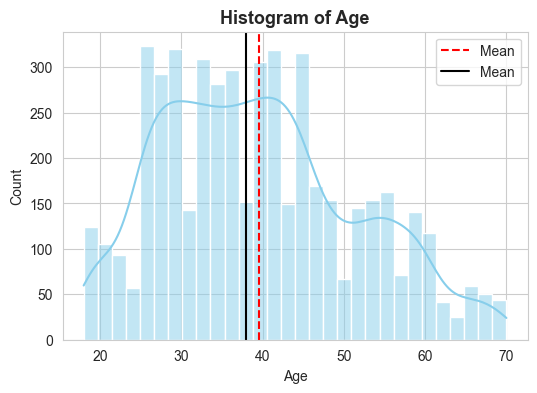

In [90]:
# Age feature

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', bins=30, kde=True, color='skyblue')
plt.axvline(df.Age.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df.Age.median(), color='black', label='Mean')
plt.title('Histogram of Age', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

As the median is lower than the mean, the missing values should be filled with the median value.

In [91]:
# Filling the missing values with Median.
df['Age'].fillna(df.Age.median(), inplace=True)

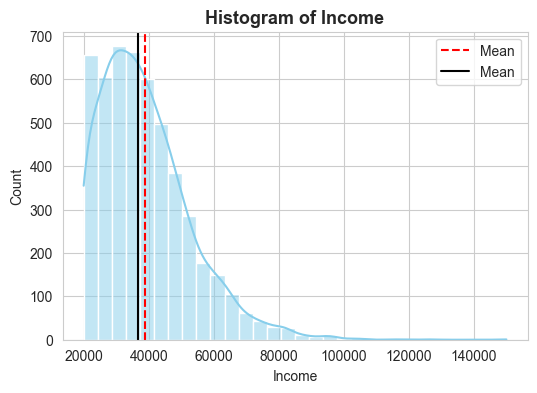

In [92]:
# Income feature

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Income', bins=30, kde=True, color='skyblue')
plt.axvline(df.Income.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df.Income.median(), color='black', label='Mean')
plt.title('Histogram of Income', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

As the median is lower than the mean, the missing values should be filled with the median value.

In [93]:
# Filling the missing values with Median.
df['Income'].fillna(df.Income.median(), inplace=True)

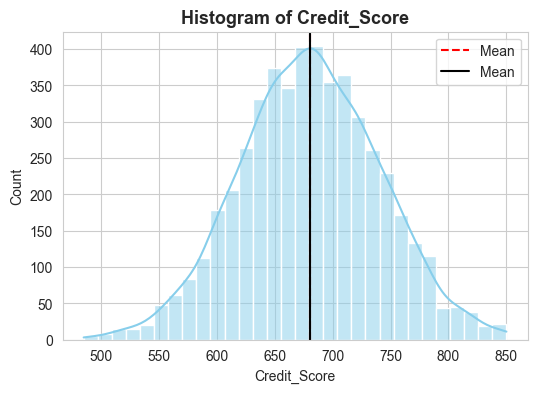

In [94]:
# Credit_Score feature

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Credit_Score', bins=30, kde=True, color='skyblue')
plt.axvline(df.Credit_Score.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df.Credit_Score.median(), color='black', label='Mean')
plt.title('Histogram of Credit_Score', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

As the median and mean are almost same, missing values can be filled with either of them. Lets use the median value.

In [95]:
# Filling the missing values with Median.
df['Credit_Score'].fillna(df.Credit_Score.median(), inplace=True)

⭐ **Conclution:**
- Initially, there were 5037 values and 10 features in this dataset.
- There were 37 duplicated rows, which were dropped.
- There were 41 missing values, which were filled with their median value.
- Final number of values is 5000, with no missing value.

## 4. Exploratory data analysis

In [96]:
# Value count of purchase column
df['Purchased'].value_counts()

Purchased
Yes    3013
No     1987
Name: count, dtype: int64

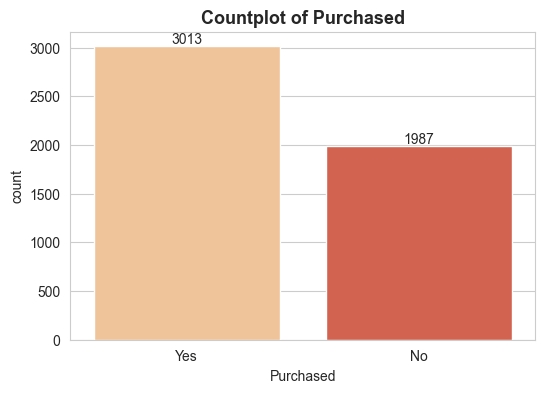

In [97]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Purchased', palette='OrRd')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Countplot of Purchased', fontsize=13, fontweight='bold')
plt.show()

In [98]:
print(f'Percentage of Yes: {round(3013/(3013+1987) * 100, 2)}%')
print(f'Percentage of No: {round(1987/(3013+1987) * 100, 2)}%')

Percentage of Yes: 60.26%
Percentage of No: 39.74%


⭐ **Conclution:**
- 2235 (60.26%) people purchased and  2765 (55.3%) people did not purchased.
- This is not a strongly imbalanced dataset and no need for oversampling.

In [99]:
# Function to plot countplot
def feature_count_plot(feature: str, palette = 'Accent'):
    plt.figure(figsize=(16, 6))

    plt.subplot(121)
    ax = sns.countplot(data=df, x=feature, palette=palette)

    for container in ax.containers:
        ax.bar_label(container, fontsize=10)
    
    plt.title(f'Count of {feature}', fontsize=13, fontweight='bold')
    

    plt.subplot(122)
    bx = sns.countplot(data=df, x=feature, palette=palette, hue='Purchased')

    for container in bx.containers:
        bx.bar_label(container, fontsize=10)
    
    plt.title(f'Count of {feature} by Purchased', fontsize=13, fontweight='bold')

    plt.show()

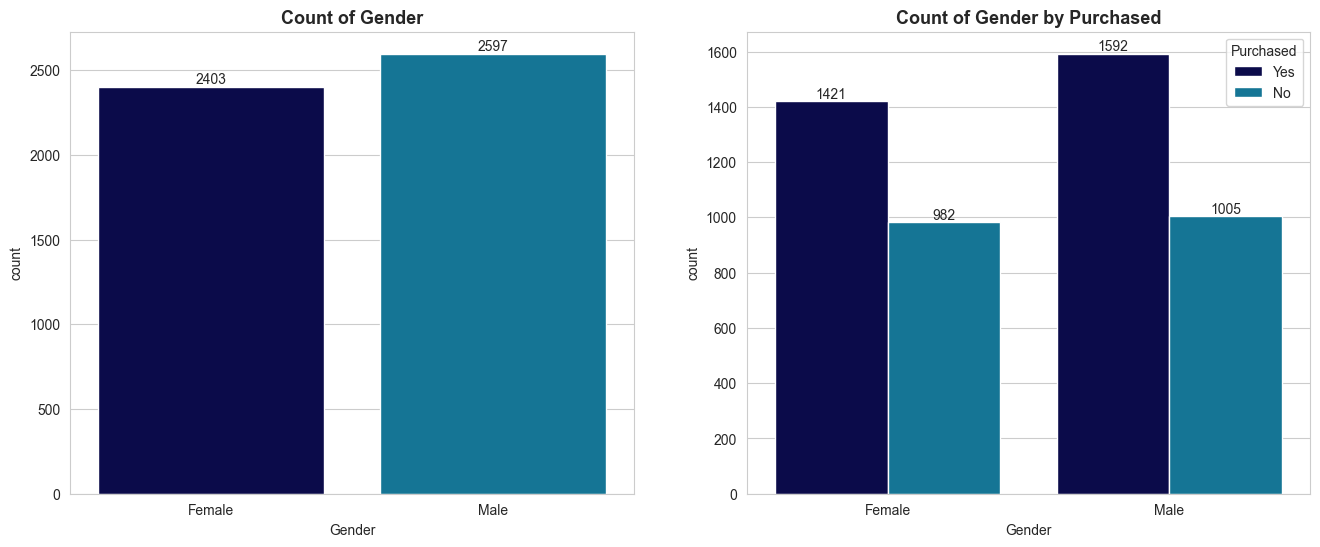

In [100]:
# Gender Feature

feature_count_plot('Gender', 'ocean')

⭐ **Conclution:**
- Gender has no influence in Purchase outcome.

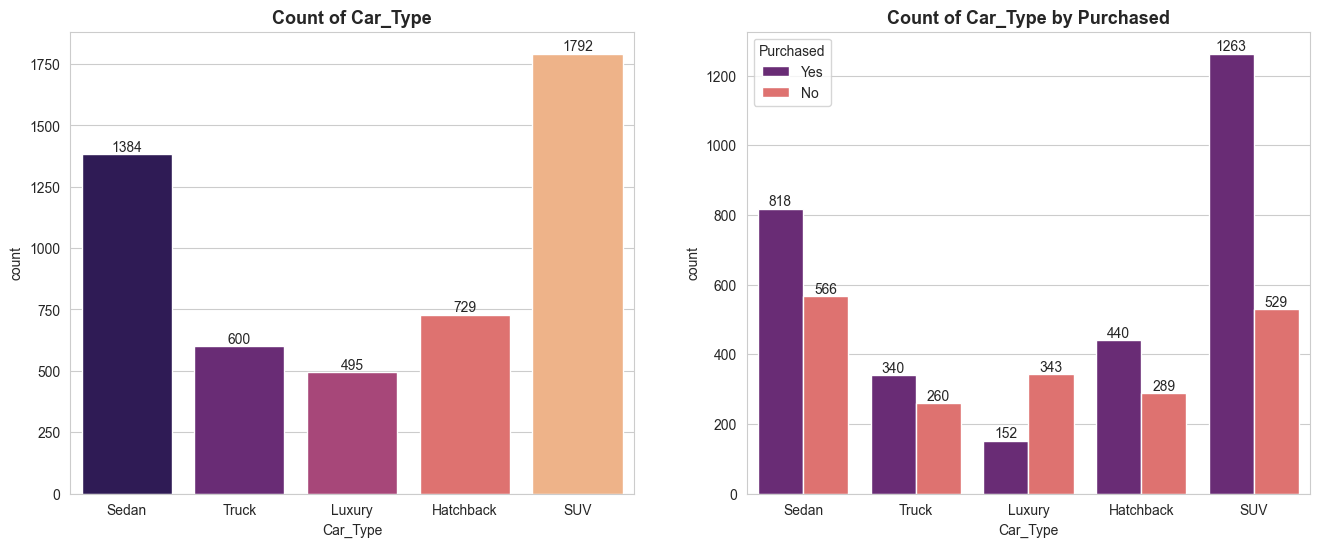

In [101]:
# Car_Type Feature

feature_count_plot('Car_Type', 'magma')

⭐ **Conclution:**
- Car_Type has influence in Purchase outcome.
- Suv and Sedan has purchsed more compare to other car types.

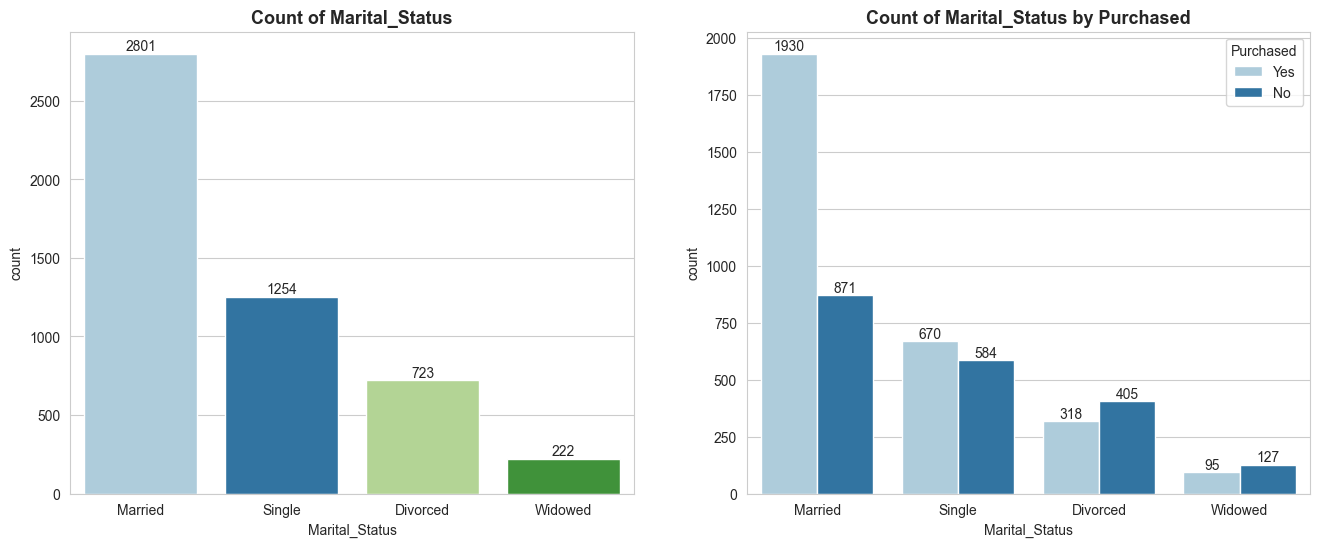

In [102]:
# Marital_Status

feature_count_plot('Marital_Status', 'Paired')

⭐ **Conclution:**
- Married people have higher purchase than others.

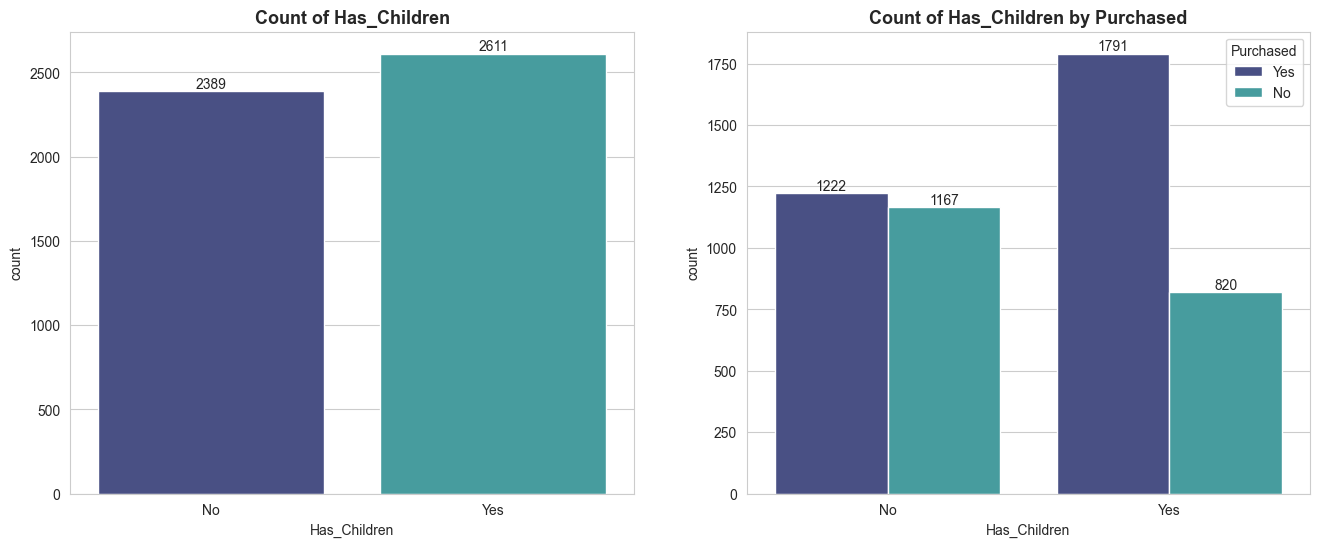

In [103]:
# Has_Children Feature

feature_count_plot('Has_Children', 'mako')

⭐ **Conclution:**
- Perchase probability is higher for the people with childern.

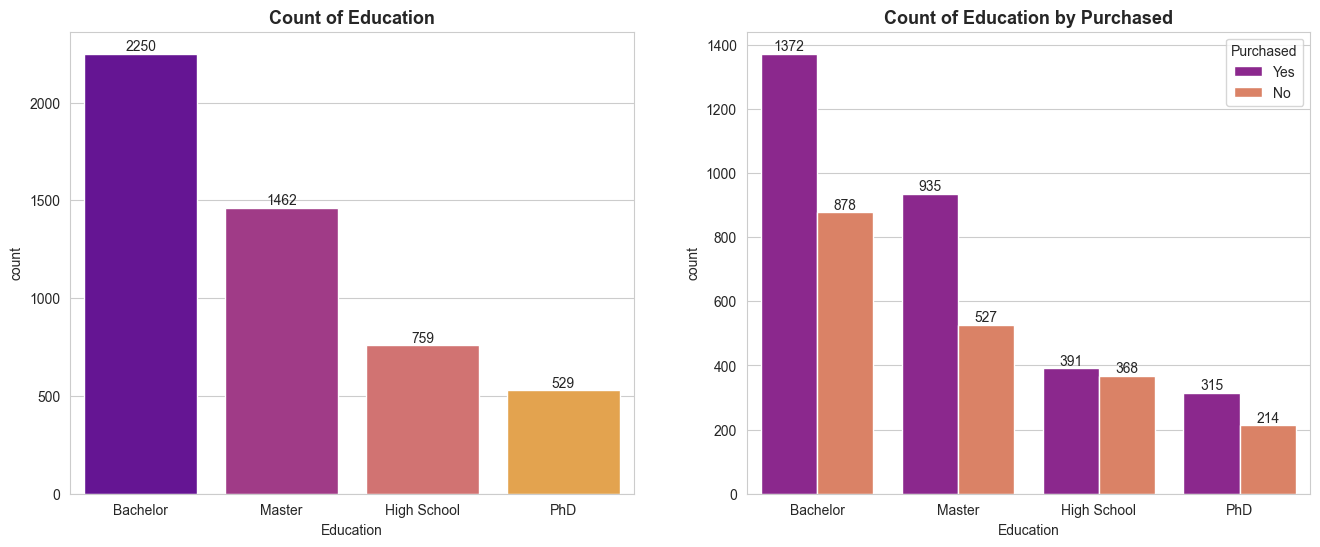

In [104]:
# Education Feature
feature_count_plot('Education', 'plasma')

⭐ **Conclution:**
- Bachelor and master has higher purchasing probability.

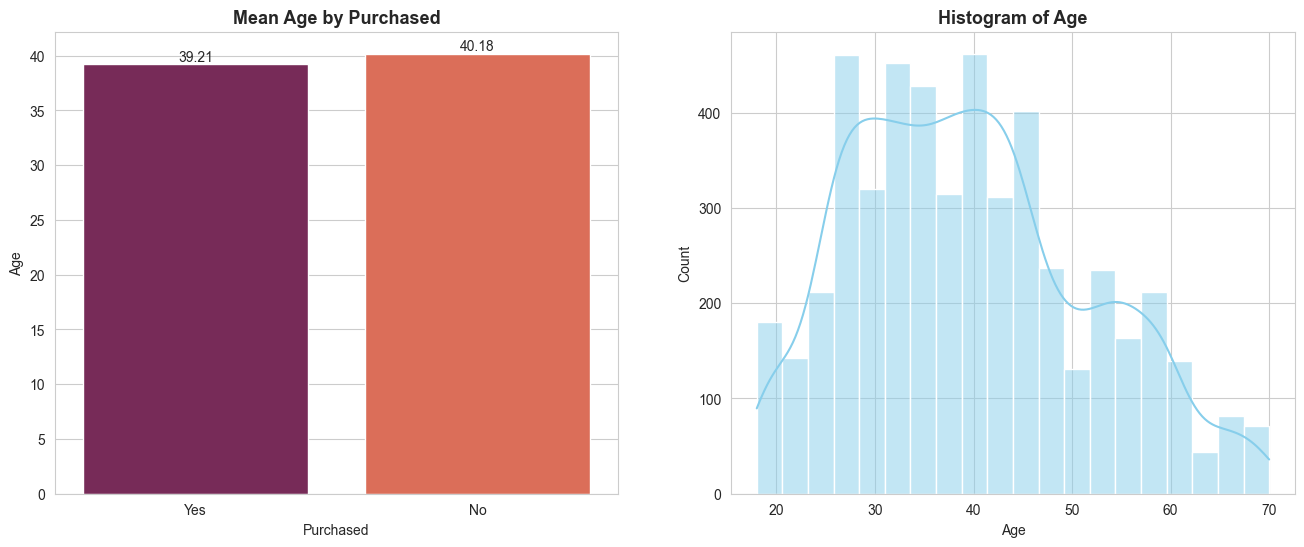

In [105]:
# Age feature
plt.figure(figsize=(16, 6))

plt.subplot(121)
ax = sns.barplot(data=df, x='Purchased', y='Age', ci=None, palette='rocket')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10)
    
plt.title('Mean Age by Purchased', fontsize=13, fontweight='bold')
    

plt.subplot(122)
sns.histplot(data=df, x='Age', color='skyblue', bins=20, kde=True)
plt.title('Histogram of Age', fontsize=13, fontweight='bold')

plt.show()

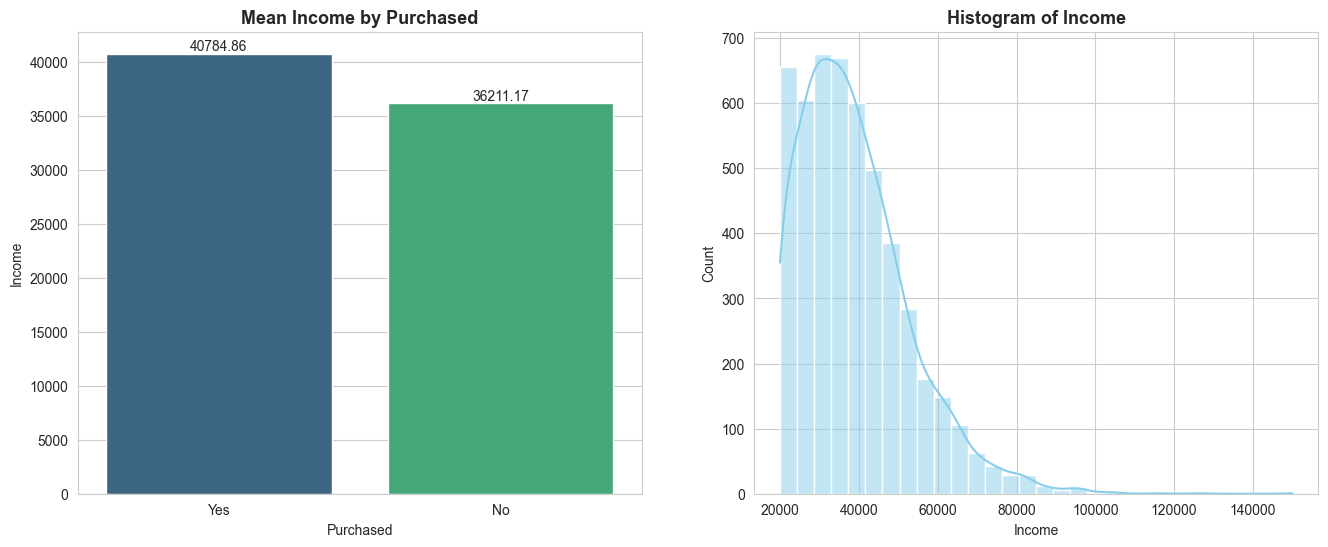

In [106]:
# Income feature
plt.figure(figsize=(16, 6))

plt.subplot(121)
ax = sns.barplot(data=df, x='Purchased', y='Income', ci=None, palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10)
    
plt.title('Mean Income by Purchased', fontsize=13, fontweight='bold')
    

plt.subplot(122)
sns.histplot(data=df, x='Income', color='skyblue', bins=30, kde=True)
plt.title('Histogram of Income', fontsize=13, fontweight='bold')

plt.show()

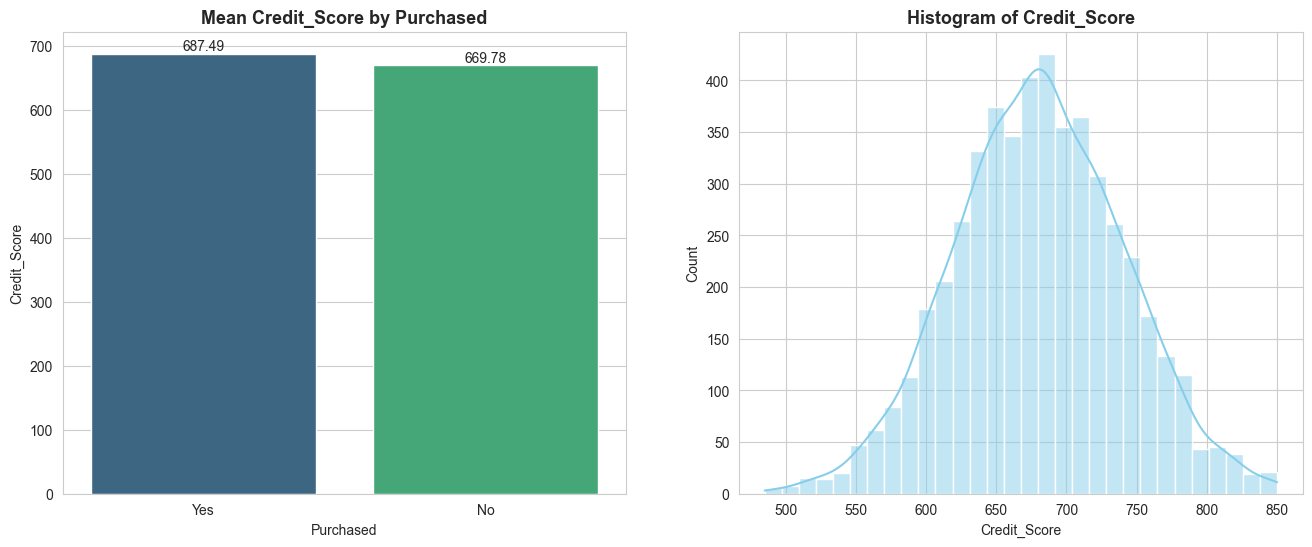

In [107]:
# Credit_Score feature
plt.figure(figsize=(16, 6))

plt.subplot(121)
ax = sns.barplot(data=df, x='Purchased', y='Credit_Score', ci=None, palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10)
    
plt.title('Mean Credit_Score by Purchased', fontsize=13, fontweight='bold')
    

plt.subplot(122)
sns.histplot(data=df, x='Credit_Score', color='skyblue', bins=30, kde=True)
plt.title('Histogram of Credit_Score', fontsize=13, fontweight='bold')

plt.show()

## 5. Feature engineering

### 5.1 Coverting numerical features to categorical

In [108]:
# Coverting Age to Age_Group

# Create Age Groups
bins = [0, 29, 44, 54, 100] # Age range
labels = ["Youth", "Young_Adult", "Adult", "Senior"]  # Group names

df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

df.head()

,Customer_ID,Gender,Age,Income,Car_Type,Marital_Status,Has_Children,Education,Credit_Score,Purchased,Age_Group
0,CUST14792,Female,38.0,46207.0,Sedan,Married,No,Bachelor,655.0,Yes,Young_Adult
1,CUST13238,Female,38.0,57772.0,Truck,Married,Yes,Bachelor,630.0,No,Young_Adult
2,CUST12833,Female,38.0,26054.0,Luxury,Single,No,Master,516.0,No,Young_Adult
3,CUST13048,Male,38.0,58508.0,Hatchback,Single,Yes,Master,667.0,No,Young_Adult
4,CUST13309,Male,38.0,35518.0,SUV,Divorced,No,Master,661.0,No,Young_Adult


In [109]:
# Coverting Income to Income Level

# Create Income Levels
bins = [0, 40000, 60000, 90000, 200000] # Income range
labels = ["Low", "Medium", "High", "Very_High"]  # Level names

df["Income_Level"] = pd.cut(df["Income"], bins=bins, labels=labels, right=True)

df.head()

,Customer_ID,Gender,Age,Income,Car_Type,Marital_Status,Has_Children,Education,Credit_Score,Purchased,Age_Group,Income_Level
0,CUST14792,Female,38.0,46207.0,Sedan,Married,No,Bachelor,655.0,Yes,Young_Adult,Medium
1,CUST13238,Female,38.0,57772.0,Truck,Married,Yes,Bachelor,630.0,No,Young_Adult,Medium
2,CUST12833,Female,38.0,26054.0,Luxury,Single,No,Master,516.0,No,Young_Adult,Low
3,CUST13048,Male,38.0,58508.0,Hatchback,Single,Yes,Master,667.0,No,Young_Adult,Medium
4,CUST13309,Male,38.0,35518.0,SUV,Divorced,No,Master,661.0,No,Young_Adult,Low


In [110]:
# Coverting Credit_Score to Credit_Score_Category

# Create Score Category
bins = [300, 579, 669, 739, 799, 850] # Score range
labels = ["Poor", "Fair", "Good", "Very Good", "Excellent"]  # Category names

df["Credit_Score_Category"] = pd.cut(df["Credit_Score"], bins=bins, labels=labels, right=True)

df.head()

,Customer_ID,Gender,Age,Income,Car_Type,Marital_Status,Has_Children,Education,Credit_Score,Purchased,Age_Group,Income_Level,Credit_Score_Category
0,CUST14792,Female,38.0,46207.0,Sedan,Married,No,Bachelor,655.0,Yes,Young_Adult,Medium,Fair
1,CUST13238,Female,38.0,57772.0,Truck,Married,Yes,Bachelor,630.0,No,Young_Adult,Medium,Fair
2,CUST12833,Female,38.0,26054.0,Luxury,Single,No,Master,516.0,No,Young_Adult,Low,Poor
3,CUST13048,Male,38.0,58508.0,Hatchback,Single,Yes,Master,667.0,No,Young_Adult,Medium,Fair
4,CUST13309,Male,38.0,35518.0,SUV,Divorced,No,Master,661.0,No,Young_Adult,Low,Fair


In [111]:
# Creating final DF by droping Customer_ID and numerical features

final_df = df.drop(['Customer_ID', 'Gender', 'Age', 'Income', 'Credit_Score'], axis=1) # Gender has no influence in purchase outcome
final_df.head()

,Car_Type,Marital_Status,Has_Children,Education,Purchased,Age_Group,Income_Level,Credit_Score_Category
0,Sedan,Married,No,Bachelor,Yes,Young_Adult,Medium,Fair
1,Truck,Married,Yes,Bachelor,No,Young_Adult,Medium,Fair
2,Luxury,Single,No,Master,No,Young_Adult,Low,Poor
3,Hatchback,Single,Yes,Master,No,Young_Adult,Medium,Fair
4,SUV,Divorced,No,Master,No,Young_Adult,Low,Fair


In [112]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 5036
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Car_Type               5000 non-null   object  
 1   Marital_Status         5000 non-null   object  
 2   Has_Children           5000 non-null   object  
 3   Education              5000 non-null   object  
 4   Purchased              5000 non-null   object  
 5   Age_Group              5000 non-null   category
 6   Income_Level           5000 non-null   category
 7   Credit_Score_Category  5000 non-null   category
dtypes: category(3), object(5)
memory usage: 249.6+ KB


### 5.2 Encoding

In [113]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [114]:
# Encoding all the categorical columns
for col in final_df.columns:
    if final_df[col].dtype == 'object' or final_df[col].dtype == 'category':
        final_df[col] = le.fit_transform(final_df[col]) # Updating the values

final_df.head()

,Car_Type,Marital_Status,Has_Children,Education,Purchased,Age_Group,Income_Level,Credit_Score_Category
0,3,1,0,0,1,2,2,1
1,4,1,1,0,0,2,2,1
2,1,2,0,2,0,2,1,3
3,0,2,1,2,0,2,2,1
4,2,0,0,2,0,2,1,1


### 5.3 Separating features and target

In [115]:
# Features
x = final_df.drop('Purchased', axis=1)

# Target
y = final_df['Purchased']

print(x.shape)
print(y.shape)

(5000, 7)
(5000,)


## 6. Modeling

### 6.1 Spliting traing and testing data

In [116]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=71)

In [117]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(3750, 7)
(3750,)
(1250, 7)
(1250,)


### 6.2: Training the model

In [121]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(xtrain, ytrain) # Training the model

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## 7. Testing

In [ ]:
model.score(xtrain, ytrain) # Training Score

0.8405333333333334

In [128]:
model.score(xtest, ytest) # Testing Score

0.5984

⭐ **Conclution:**
- This is aoverfit model.
- Training score is higher than the testing data.